In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Introduction**

The Wine dataset, contains information about the chemical properties of various wines, was analyzed using two machine learning classification models: Naive Bayes and Support Vector Machine (SVM).

**Objective**

 To classify wines into  classes based on chemical properties.

 **Data Dictionary**

The dataset contains several features that describe the chemical properties of wines. Common features include:

* **Alcohol**: The alcohol content of the wine.
* **Malic Acid**: The amount of malic acid in the wine.
* **Ash**: The ash content in the wine.
* **Alc**: The level of alcalinity of ash in the wine.
* **Magnesium**: The amount of magnesium in the wine.
* **Phenols**: The total phenolic content in the wine.
* **Flavanoids**: The amount of flavanoids in the wine.
* **Nonflavanoid Phenols**: The level of nonflavanoid phenols in the wine.
* **Proanthocyanins**: The amount of proanthocyanins in the wine.
* **Color Intensity**: The intensity of the color in the wine.
* **Hue**: The hue of the wine.
* **OD**: OD280/OD315 of Diluted Wines,the optical density of the wine.
* **Proline**: A numeric measurement of proline in the wine.
* **Class**: Categories (1,2,3)

**Table of Contents**:




>[Introduction](#scrollTo=bbWDN5zy5n1m)

>[1.Data Exploration](#scrollTo=HfX3DxaE5nn_)

>>[1.1. Import libraries](#scrollTo=nRhBtaIm3xtk)

>>[1.2. Load the dataset](#scrollTo=MKR4uzd735gC)

>>[1.3. Data Visualisation](#scrollTo=NTursmkKuhoP)

>[Data Preprocessing](#scrollTo=xB_iYHKy6j1h)

>>[2.1. Misssing Values](#scrollTo=sNmQqIwWHU29)

>>[2.2. Feature engineering](#scrollTo=GbztzzsuHnW3)

>[Model Selection](#scrollTo=0vtKFKU-8WL4)

>>[3.1. Support Vector Machines(SVM)](#scrollTo=PDpVy3v4g_IA)

>>[3.2. Naive Bayes(NB)](#scrollTo=HVqBQE00hDLF)

>[Model Evaluation](#scrollTo=8JdKlBRg8wih)

>>[4.1. SVM](#scrollTo=V58A-2HUhga0)

>>[4.2. NB](#scrollTo=npOdMSkFhmyi)

>[Discussion](#scrollTo=I6sOF5I89Jmh)

>[Conclusion](#scrollTo=5NGw0NUMoZDo)



#1.**Data Exploration**

## 1.1. **Import libraries**

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 1.2. **Load the dataset**

In [ ]:
def load_dataset(file_path):
    df = pd.read_csv(file_path)
    return df
data = load_dataset("/content/drive/MyDrive/Assignments/wine.csv")
data.head()

Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0     1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1     1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2     1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3     1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4     1    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04  2.93      735

In [ ]:
#Shape of the dataset
data.shape

(178, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
data.describe()

Wine     Alcohol  Malic.acid         Ash         Acl          Mg  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoid.phenols     Proanth   Color.int  \
count  178.000000  178.000000            178.000000  178.000000  178.000000   
mean     2.295112    2.029270              0.361854    1.590899    5.058090   
std      0.625851    0.998859              0.124453    0.572359    2.318286   
min      0.980000    0.340000              0.130000    0.410000    1.280000   
25%      1.742500    1.205000              0.270000    1.250000    3.220000   
50%      2.355000    2.135000              0.340000    1.555000    4.690000   
75%      2.800000    2.875000              0.437500    1.950000    6.200000   
max      3.880000    5.080000              0.660000    3.580000   13.000000   

              Hue          OD      Proline  
count  178.000000  178.000000   178.000000  
mean     0.957449    2.611685   746.893258  
std      0.228572    0.709990   314.907474  
min      0.480000    1.270000   278.000000  
25%      0.782500    1.937500   500.500000  
50%      0.965000    2.780000   673.500000  
75%      1.120000    3.170000   985.000000  
max      1.710000    4.000000  1680.000000

In [ ]:
#Target class names
target_names =data['Wine'].unique()

print("Target Class Names:")
for i, class_name in enumerate(target_names):
    print(f"Class {i + 1}: {class_name}")

Target Class Names:
Class 1: 1
Class 2: 2
Class 3: 3


In [ ]:
#Summary Statistics
class_distribution = data['Wine'].value_counts()
print(class_distribution)

2    71
1    59
3    48
Name: Wine, dtype: int64


In [ ]:
#Check the percentage classes
data.Wine.value_counts(normalize=True).round(2)

2    0.40
1    0.33
3    0.27
Name: Wine, dtype: float64

The initial step involved loading the dataset and exploring its basic statistics. The dataset comprises 178 samples of wine, each belonging to one of three classes (1, 2, or 3). There are no missing values in the dataset, and it includes 13 features, representing various chemical properties, and the target variable "Wine."

##1.3. **Data Visualisation**

<Figure size 600x400 with 0 Axes>

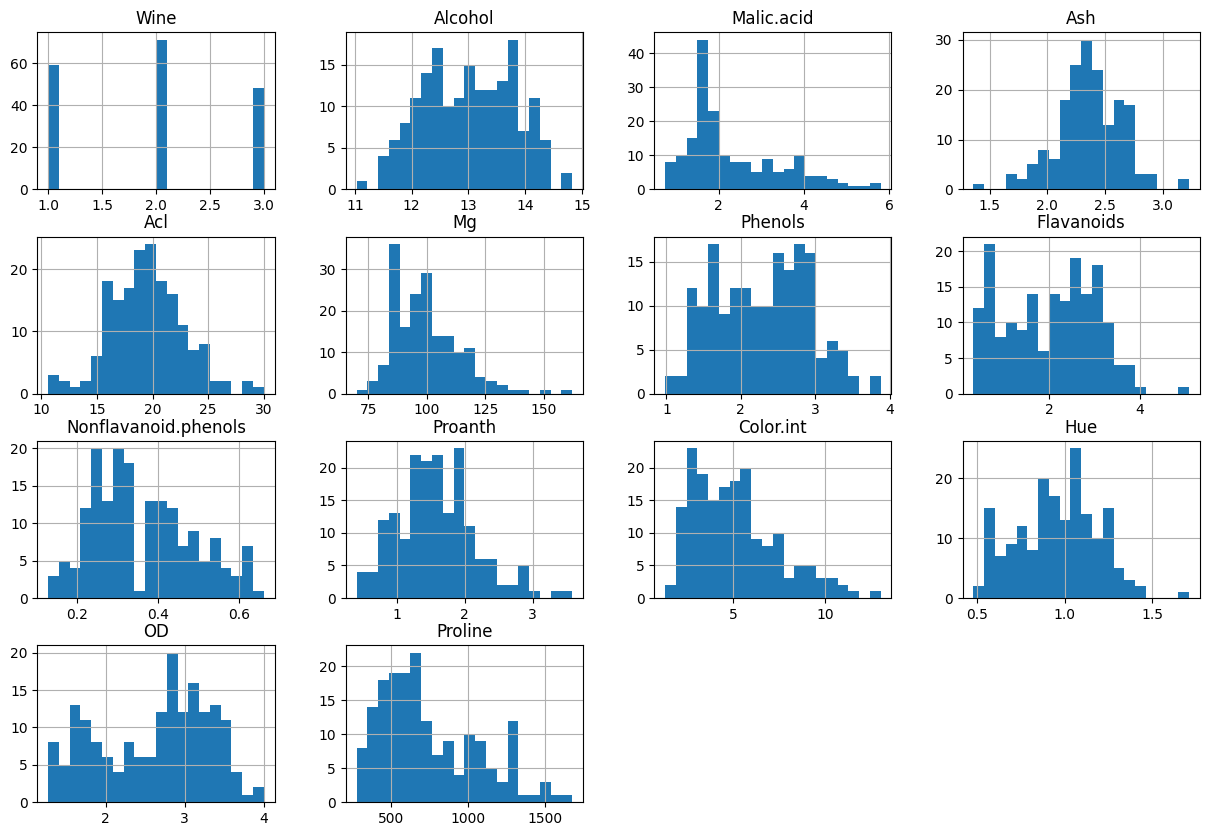

In [ ]:
#Visualize the dataset
plt.figure(figsize=(6, 4))
data.hist(bins=20, figsize=(15, 10))
plt.show()

The histograms of the various chemical properties in the wine dataset reveal the distribution of these characteristics among the samples. The alcohol content show a relatively normal distribution with a peak around 12-14%, signifying a broad range of alcohol levels across the wines. In contrast, the malic acid distribution skews to the right, indicating that most wines have lower malic acid content, though some exhibit higher values. The ash content displays a nearly normal distribution, with a peak at approximately 2.3, suggesting that many wines share similar ash content. The alkalinity of ash also reveals a peak around 18, signifying a prevalent alkalinity level among the wines. The mg distribution is right-skewed, emphasizing that most wines have lower magnesium content, with outliers displaying considerably higher levels. Total phenols and flavanoids both present right-skewed distributions, with most wines having lower content, and the rest are also showing

<Figure size 600x400 with 0 Axes>

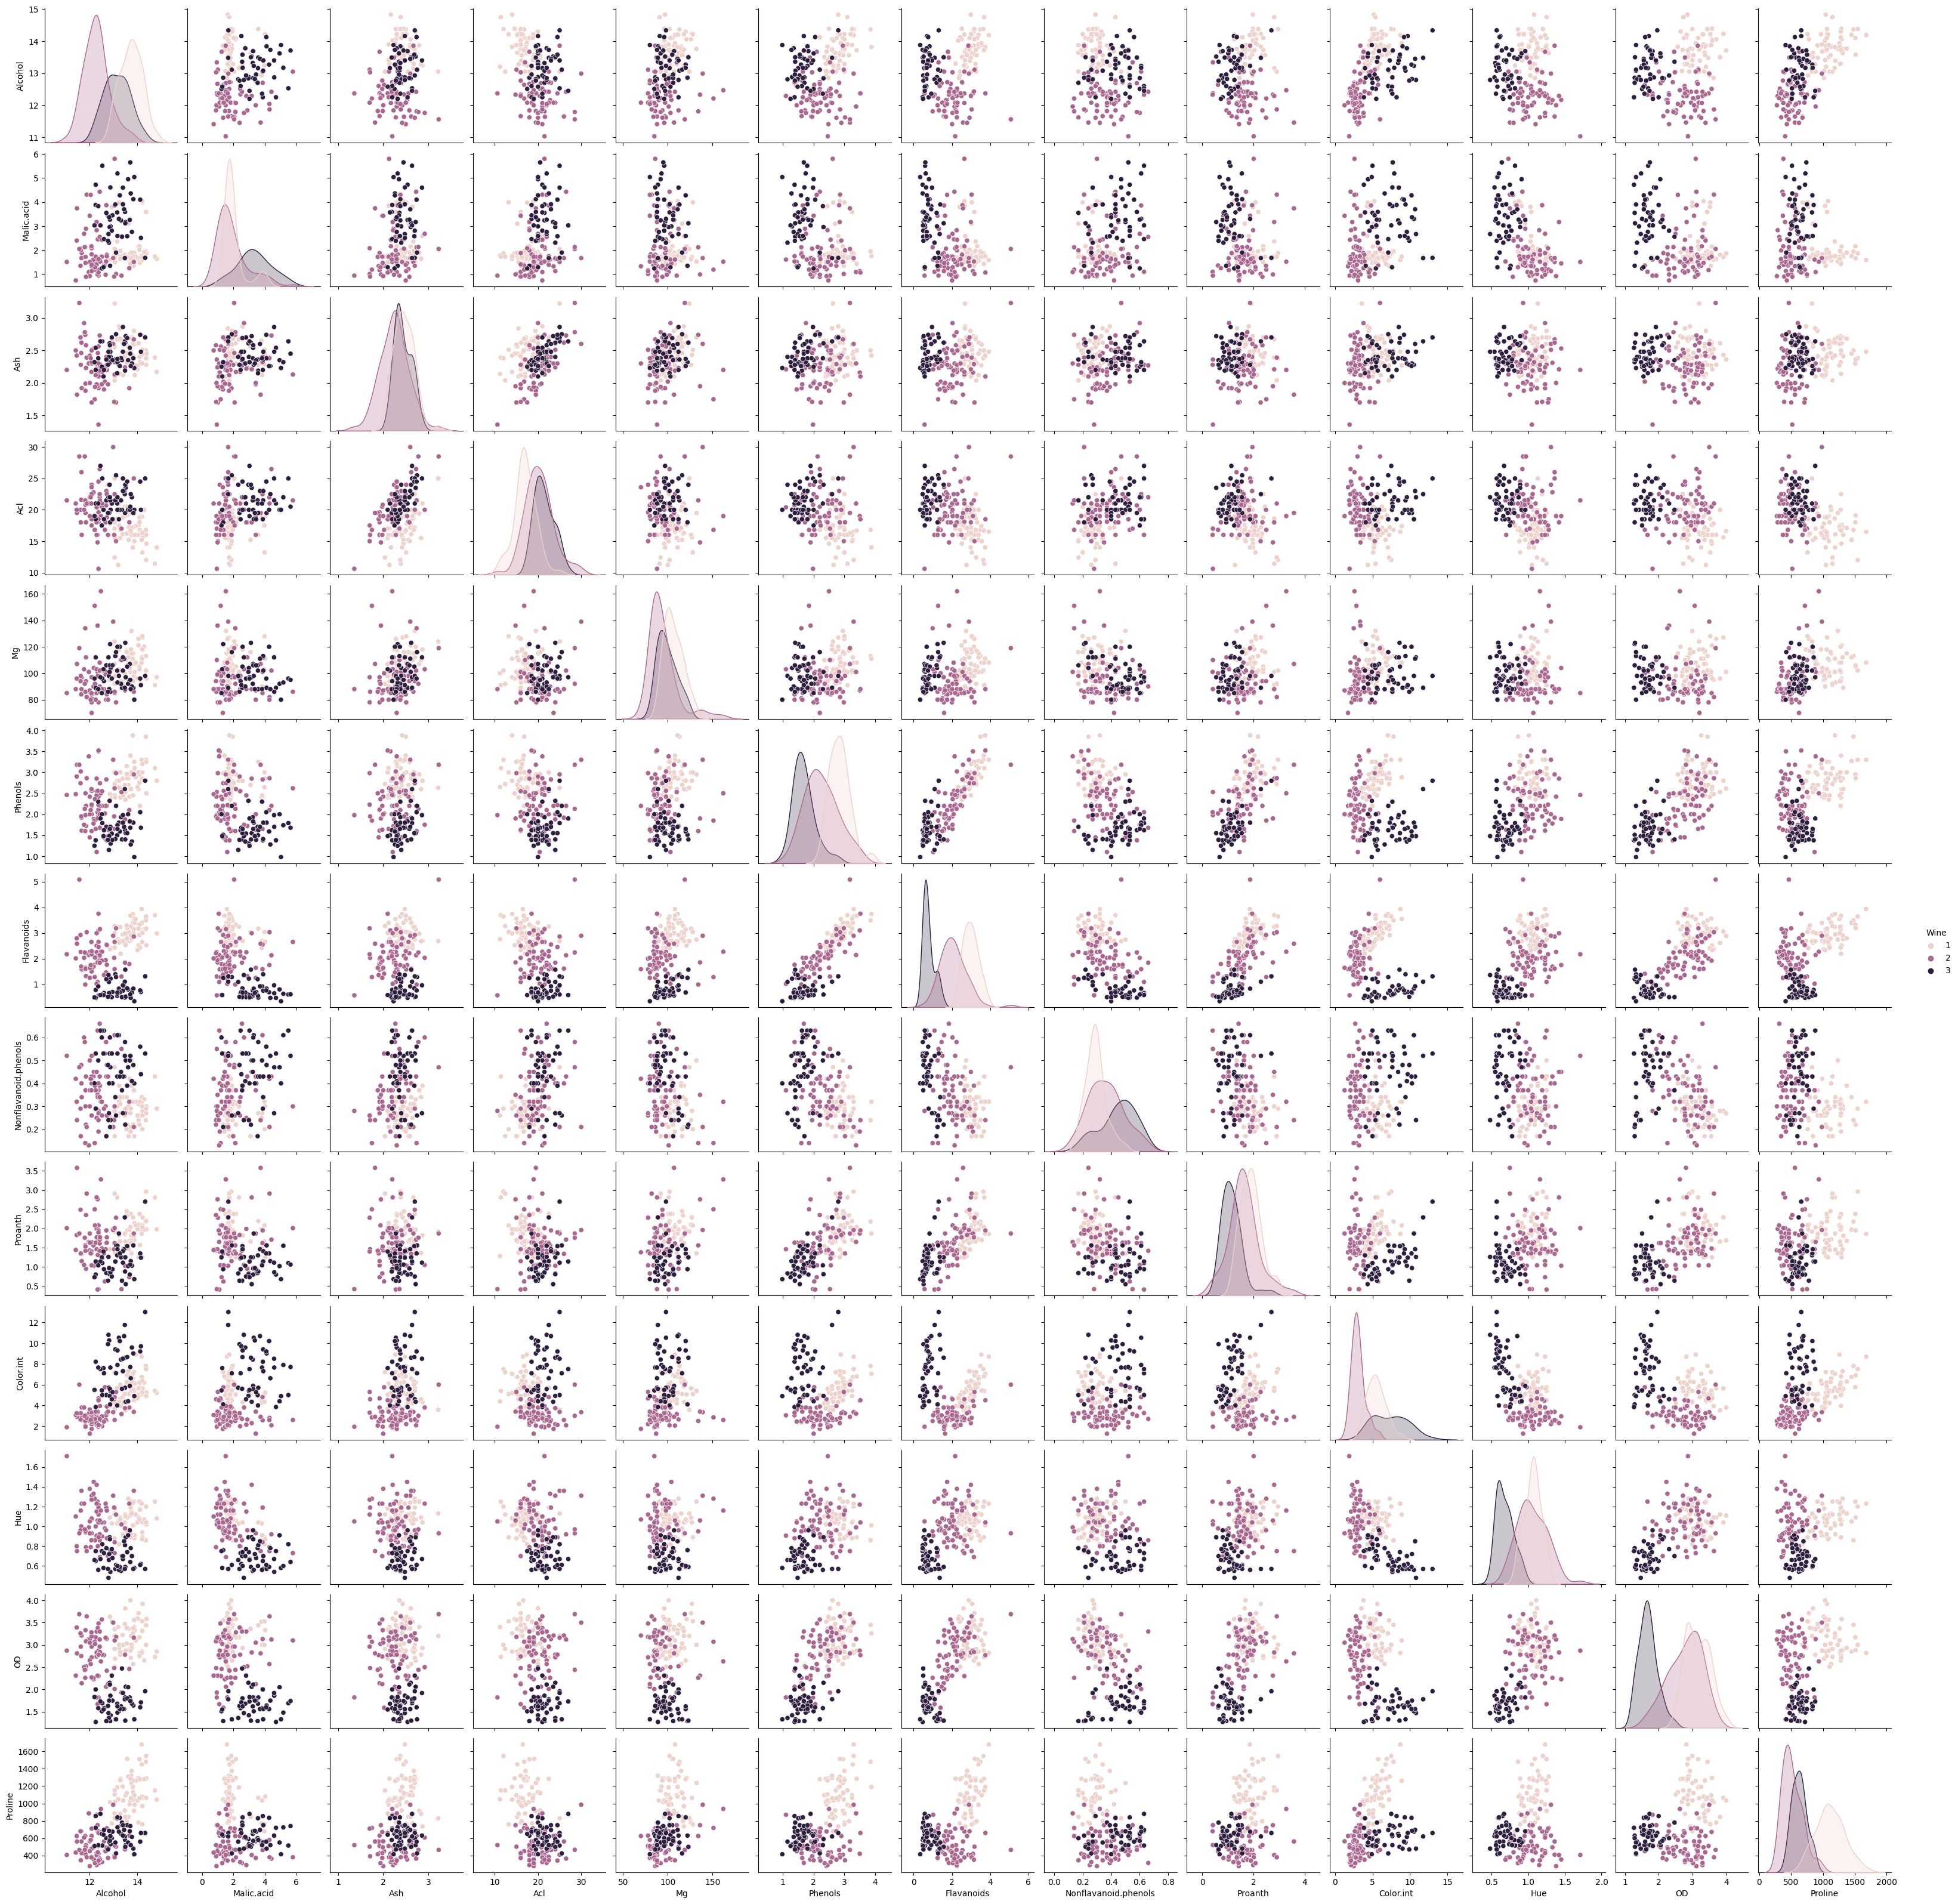

In [ ]:
#Create a pair plot to visualize relationships between different variables
plt.figure(figsize=(6, 4))
sns.pairplot(data, hue='Wine', diag_kind='kde')
plt.show()

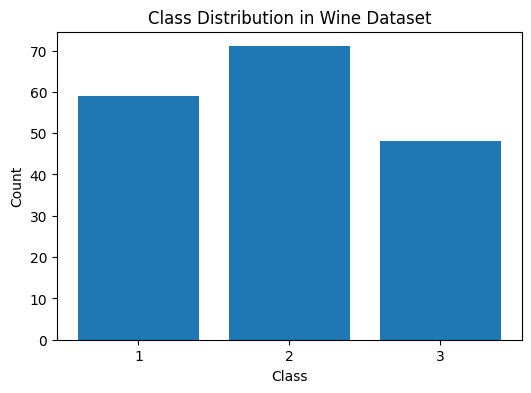

In [ ]:
#Class distribution
class_distribution = data['Wine'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(class_distribution.index, class_distribution.values, tick_label=class_distribution.index)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in Wine Dataset')
plt.show()

The bar graph shows the class distribution of a wine dataset. The x-axis shows the class, and the y-axis shows the count of wines in each class. The most common class is class 2, with 71% of the wines. Class 1 is the second most common class.

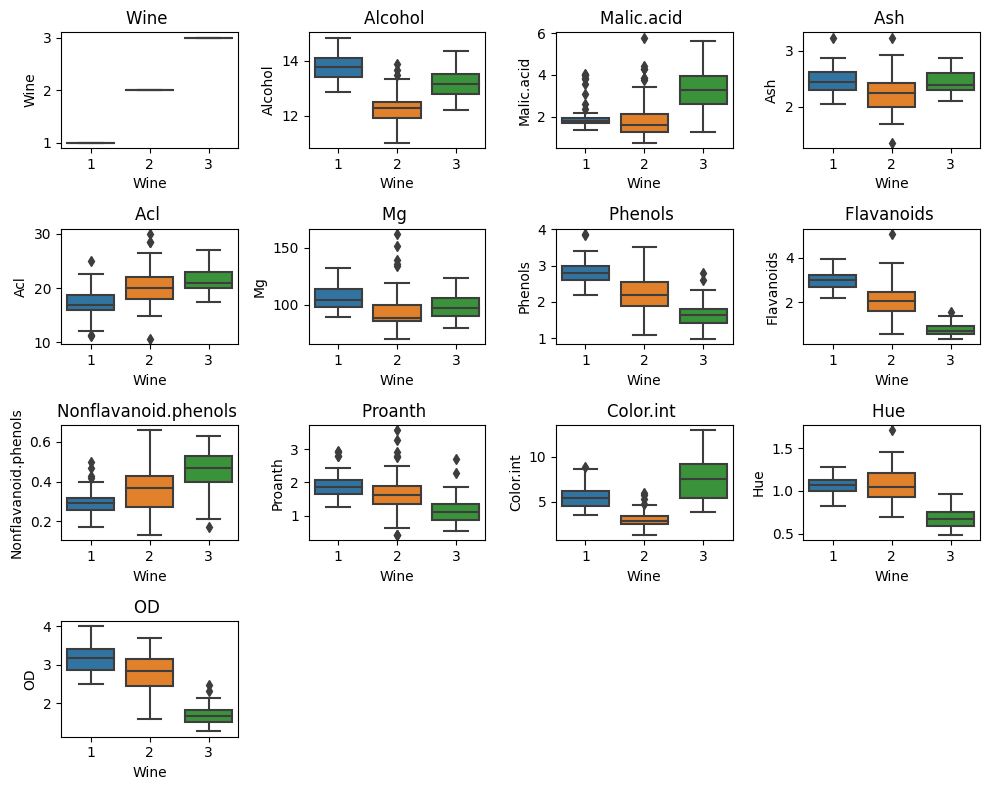

In [ ]:
#The distribution of features across different wine classes
plt.figure(figsize=(10, 8))
num_rows = 4
num_columns = 4

for i, feature in enumerate(data.columns[:-1]):
    plt.subplot(num_rows, num_columns, i + 1)
    sns.boxplot(x='Wine', y=feature, data=data)
    plt.title(f'{feature} ')
plt.tight_layout()
plt.show()

The box plots provide a clear visual summary of how chemical properties are distributed among the three wine classes. It's evident that Class 1 wines generally have higher alcohol, phenol, and flavonoid levels compared to the other classes. However, Class 2 and Class 3 wines display varying chemical profiles. While there are a few outliers in each class, they don't significantly affect the overall distribution and can be retained for analysis. The box plots effectively illustrate the differences in chemical properties that distinguish the wine classes.

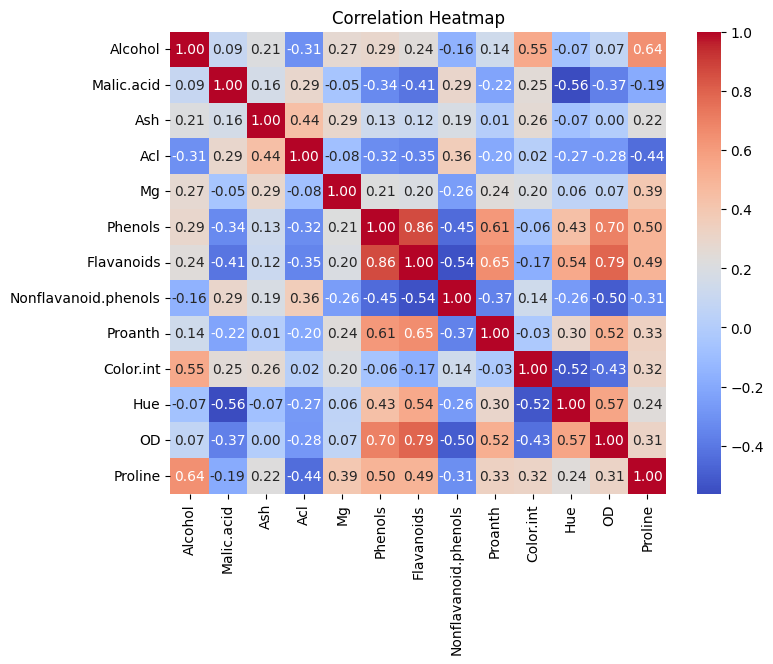

In [ ]:
#Correlation of features
correlation_matrix = data.drop('Wine', axis=1).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap shows the relationships between different wine compounds.Strong positive correlations indicate that as one property increases, another tends to increase as well, while strong negative correlations suggest that they move in opposite directions. The heatmap shows that some compounds are positively correlated, meaning that they tend to occur together in wine.For instance, alcohol appears to be positively correlated with certain compounds like total colour intensity and proline. Phenols are correlated with Flavonoids and OD. Other compounds are negatively correlated, meaning that they tend to occur inversely to each other in wine. For example, malic acid is negatively correlated with Hue.

#2. **Data Preprocessing**

##2.1. **Misssing Values**

In [ ]:
#Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64


##2.2. **Feature engineering**

In [ ]:
#Separate features (X) and target (y)
X = data.drop('Wine', axis=1)
y = data['Wine']

In [ ]:
#Encoding target variable
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
#Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

Data preprocessing involved scaling the features to ensure that all features have the same scale and splitting the data into training and testing sets. The data was divided into 80% training data and 20% testing data.

#3. **Model Selection**

##3.1. **Support Vector Machines(SVM)**

In [ ]:
#Model Selection
svm_classifier = SVC(kernel = 'linear', random_state = 0)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

##3.2. **Naive Bayes(NB)**

In [ ]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

#4. **Model Evaluation**

##4.1. **SVM**

In [ ]:
#Evaluate SVM
svm_predictions = svm_classifier.predict(X_test)
print("SVM Classification Report:\n", classification_report(y_test, svm_predictions))

#Create the confusion matrix for SVM
svm_confusion = confusion_matrix(y_test, svm_predictions)
print("\nSVM Confusion Matrix:")
print(svm_confusion)

SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54


SVM Confusion Matrix:
[[19  0  0]
 [ 0 20  1]
 [ 0  0 14]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Overall Accuracy:",accuracy_score(y_test, svm_predictions))
print("Overall Precision:",precision_score(y_test, svm_predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, svm_predictions, average='macro'))

Overall Accuracy: 0.9814814814814815
Overall Precision: 0.9777777777777779
Overall Recall: 0.9841269841269842


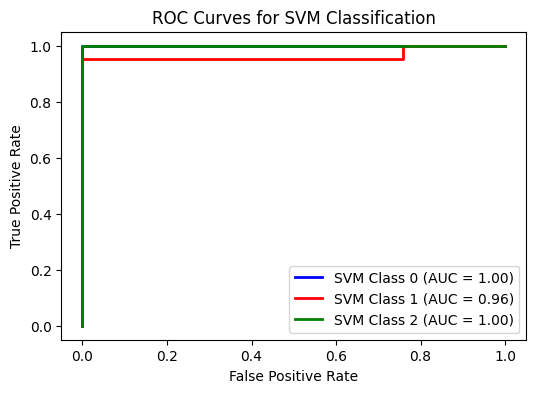

In [ ]:
#Calculate ROC curves for each class using SVM
svm_decision_function = svm_classifier.decision_function(X_test)
fpr = {}
tpr = {}
roc_auc = {}
y_bin = label_binarize(y_test, classes=[0, 1, 2])
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], svm_decision_function[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(6,4))
colors = ['blue', 'red', 'green']
for i in range(3):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'SVM Class {i} (AUC = {roc_auc[i]:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for SVM Classification')
plt.legend(loc='lower right')
plt.show()

In [ ]:
svm_decision_function = svm_classifier.decision_function(X_test)
svm_probabilities = np.exp(svm_decision_function) / np.sum(np.exp(svm_decision_function), axis=1)[:, np.newaxis]
svm_auc = roc_auc_score(y_test, svm_probabilities, multi_class='ovr')
print(f"AUC for SVM: {svm_auc:.2f}")

AUC for SVM: 0.99


In [ ]:
#Get the feature importances of SVM model
result = permutation_importance(svm_classifier, X_test, y_test, n_repeats=30, random_state=0)

importance = result.importances_mean
feature_names = data.columns[:-1]

importance_per_feature = list(zip(feature_names, importance))

importance_per_feature.sort(key=lambda x: x[1], reverse=True)

top_n = 5
print(f"Top {top_n} Important Features:")
for feature, importance in importance_per_feature[:top_n]:
    print(f"{feature}: {importance:.4f}")

Top 5 Important Features:
Color.int: 0.0858
Phenols: 0.0679
OD: 0.0648
Wine: 0.0617
Malic.acid: 0.0451


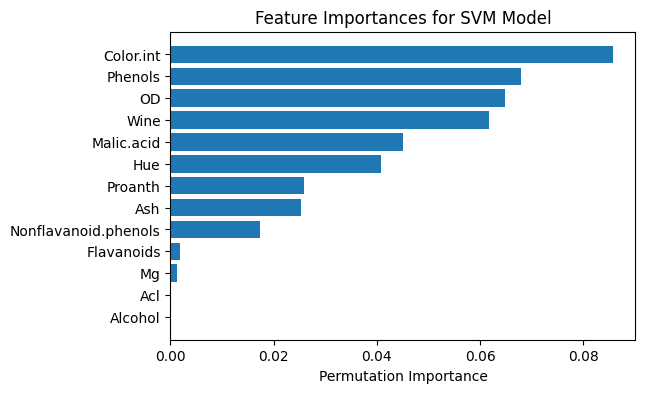

In [ ]:
#Feature importances using permutation importance
result = permutation_importance(svm_classifier, X_test, y_test, n_repeats=30, random_state=0)

importance = result.importances_mean
feature_names = data.columns[:-1]

importance_per_feature = list(zip(feature_names, importance))

importance_per_feature.sort(key=lambda x: x[1])

#Extract the feature names and importances
features = [feature for feature, _ in importance_per_feature]
importances = [importance for _, importance in importance_per_feature]

plt.figure(figsize=(6, 4))
plt.barh(features, importances)
plt.xlabel('Permutation Importance')
plt.title('Feature Importances for SVM Model')
plt.show()

Above is the SVM classification report that provides an overview of the model's performance. The report includes precision, recall, and F1-score values for each of the three wine classes: Class 0, Class 1, and Class 2. For Class 0, the model demonstrates perfect precision and recall scores of 1.00, indicating that all the predictions for this class are correct, and there are no false positives or false negatives. For Class 1, the precision is still excellent at 1.00, suggesting that the majority of the positive predictions are accurate. However, the recall is slightly lower at 0.95, meaning that the model misses a small portion of actual Class 1 samples, resulting in a small number of false negatives. For Class 2, the precision is 0.93, indicating a high percentage of positive predictions are correct, but the recall is 1.00, meaning that the model correctly identifies all Class 2 samples with no false negatives. The accuracy of the model, which measures overall correctness, is 98.15%. The macro average F1-score is 0.98, reflecting the balance between precision and recall across all classes. The weighted average F1-score is also 0.98, considering class imbalance. The overall accuracy of the model is 98.15%, and it exhibits high precision and recall for each class. Additionally, the SVM model's feature importance results reveal the top five important features for classification are "colour intensity, Phenols, OD, Malic acid and wine.

##4.2. **NB**

In [ ]:
#Evaluate Naive Bayes
nb_predictions = nb_classifier.predict(X_test)
print("Naive Bayes Classification Report:\n", classification_report(y_test, nb_predictions))

#Create the confusion matrix for Naive Bayes
nb_confusion = confusion_matrix(y_test, nb_predictions)
print("Naive Bayes Confusion Matrix:")
print(nb_confusion)

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

Naive Bayes Confusion Matrix:
[[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]


In [ ]:
print("Overall Accuracy:",accuracy_score(y_test, nb_predictions))
print("Overall Precision:",precision_score(y_test, nb_predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, nb_predictions, average='macro'))

Overall Accuracy: 1.0
Overall Precision: 1.0
Overall Recall: 1.0


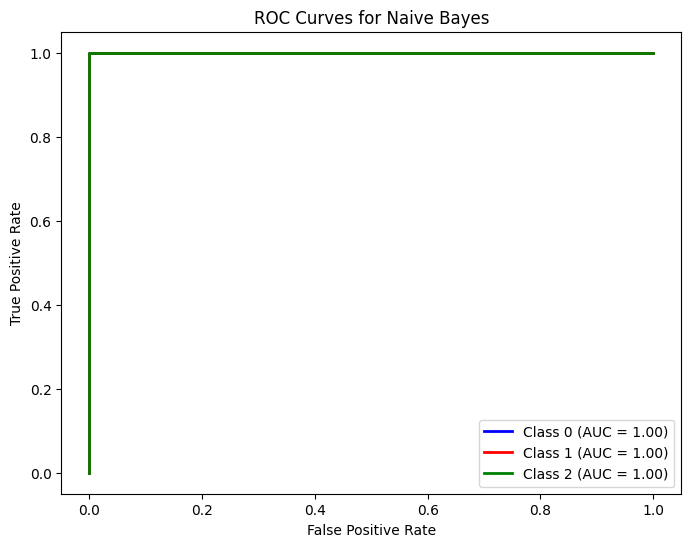

In [ ]:
#Calculate ROC curves for each class
fpr = {}
tpr = {}
roc_auc = {}

y_bin = label_binarize(y_test, classes=[0, 1, 2])

#Naive Bayes
nb_probabilities = nb_classifier.predict_proba(X_test)
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], nb_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i in range(3):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Naive Bayes')
plt.legend(loc='lower right')
plt.show()

In [ ]:
auc = roc_auc_score(y_test, nb_probabilities, multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 1.0


In [ ]:
result = permutation_importance(nb_classifier, X_test, y_test, n_repeats=30, random_state=0)

#Get the feature importances and feature names
importance = result.importances_mean
feature_names = data.columns[:-1]
importance_per_feature = list(zip(feature_names, importance))

importance_per_feature.sort(key=lambda x: x[1], reverse=True)

top_n = 5
print(f"Top {top_n} Important Features:")
for feature, importance in importance_per_feature[:top_n]:
    print(f"{feature}: {importance:.4f}")

Top 5 Important Features:
Phenols: 0.1265
Proanth: 0.1037
Hue: 0.0932
OD: 0.0716
Wine: 0.0568


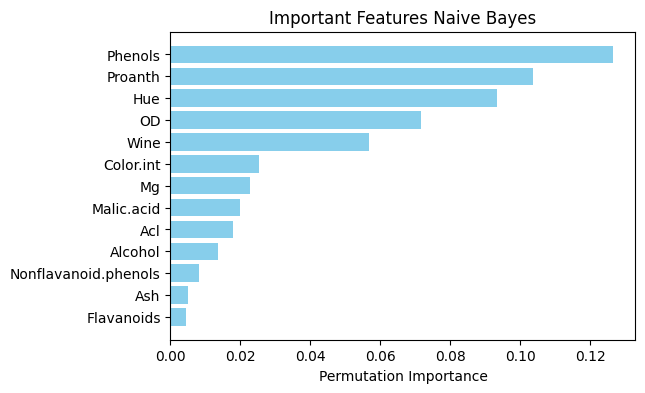

In [ ]:
#Feature importances for naive bayes
result = permutation_importance(nb_classifier, X_test, y_test, n_repeats=30, random_state=0)

importance = result.importances_mean
feature_names = data.columns[:-1]

importance_per_feature = list(zip(feature_names, importance))

importance_per_feature.sort(key=lambda x: x[1])

top_n = 13
top_features = importance_per_feature[:top_n]
top_feature_names, top_feature_importance = zip(*top_features)

plt.figure(figsize=(6, 4))
plt.barh(top_feature_names, top_feature_importance, color='skyblue')
plt.xlabel('Permutation Importance')
plt.title(f'Important Features Naive Bayes')
plt.show()

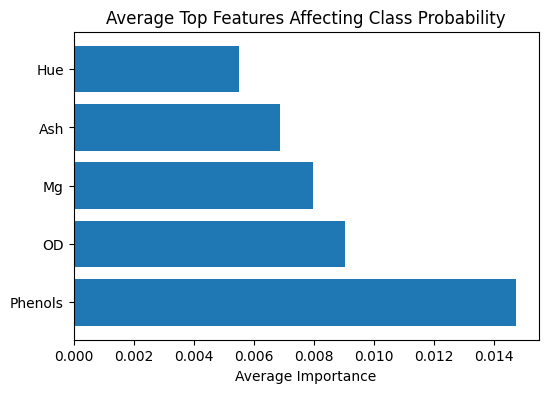

In [ ]:
#Initialize a dictionary to store feature importances
feature_importances = {feature: 0 for feature in data.columns[:-1]}

for sample_index in range(len(X_test)):
    sample = X_test[sample_index]
    class_probabilities = nb_classifier.predict_proba([sample])

    #Iterate through all features and calculate the importance
    for feature_index, feature_name in enumerate(data.columns[:-1]):

        modified_sample = sample.copy()
        modified_sample[feature_index] = 0

        modified_probabilities = nb_classifier.predict_proba([modified_sample])

        probability_difference = class_probabilities[0][0] - modified_probabilities[0][0]

        feature_importances[feature_name] += probability_difference

#Calculate the average feature importance
num_samples = len(X_test)
average_feature_importances = {feature: importance / num_samples for feature, importance in feature_importances.items()}

sorted_features = [x for x in sorted(average_feature_importances, key=average_feature_importances.get, reverse=True)]
sorted_importance = [average_feature_importances[feature] for feature in sorted_features]

plt.figure(figsize=(6,4))
plt.barh(sorted_features[:5], sorted_importance[:5])
plt.xlabel('Average Importance')
plt.title('Average Top Features Affecting Class Probability')
plt.show()

The Naive Bayes classification report demonstrates remarkable model performance in classifying wines into three categories. The precision, recall, and F1-scores are all perfect at 1.00 for each class (0, 1, and 2), indicating that the model's predictions match the true labels perfectly. This model achieves flawless accuracy in all classes, showcasing its exceptional capability. Additionally, the feature importance analysis identifies the top five influential features are Phenols, Proanth, Hue, OD, and Wine. The top features further supported by their high probability scores, are Phenol and OD underscoring their importance in the classification process.

In [ ]:
#Predict wine classes for both models
nb_predictions = nb_classifier.predict(X_test)
svm_predictions = svm_classifier.predict(X_test)

for i in range(len(X_test)):
    print(f"Sample {i + 1} - Actual Class: {y_test[i]}, Naive Bayes Predicted: {nb_predictions[i]}, SVM Predicted: {svm_predictions[i]}")

Sample 1 - Actual Class: 0, Naive Bayes Predicted: 0, SVM Predicted: 0
Sample 2 - Actual Class: 0, Naive Bayes Predicted: 0, SVM Predicted: 0
Sample 3 - Actual Class: 2, Naive Bayes Predicted: 2, SVM Predicted: 2
Sample 4 - Actual Class: 0, Naive Bayes Predicted: 0, SVM Predicted: 0
Sample 5 - Actual Class: 1, Naive Bayes Predicted: 1, SVM Predicted: 1
Sample 6 - Actual Class: 0, Naive Bayes Predicted: 0, SVM Predicted: 0
Sample 7 - Actual Class: 1, Naive Bayes Predicted: 1, SVM Predicted: 1
Sample 8 - Actual Class: 2, Naive Bayes Predicted: 2, SVM Predicted: 2
Sample 9 - Actual Class: 1, Naive Bayes Predicted: 1, SVM Predicted: 1
Sample 10 - Actual Class: 2, Naive Bayes Predicted: 2, SVM Predicted: 2
Sample 11 - Actual Class: 0, Naive Bayes Predicted: 0, SVM Predicted: 0
Sample 12 - Actual Class: 2, Naive Bayes Predicted: 2, SVM Predicted: 2
Sample 13 - Actual Class: 0, Naive Bayes Predicted: 0, SVM Predicted: 0
Sample 14 - Actual Class: 1, Naive Bayes Predicted: 1, SVM Predicted: 1
S

In [ ]:
predictions_df = pd.DataFrame({'Prediction_NB': nb_predictions, 'Prediction_SVM': svm_predictions, 'Target': y_test})

#Determine if predictions are hits (True) or misses (False)
predictions_df['Hit_NB'] = predictions_df['Prediction_NB'] == predictions_df['Target']
predictions_df['Hit_SVM'] = predictions_df['Prediction_SVM'] == predictions_df['Target']

print(predictions_df)

    Prediction_NB  Prediction_SVM  Target  Hit_NB  Hit_SVM
0               0               0       0    True     True
1               0               0       0    True     True
2               2               2       2    True     True
3               0               0       0    True     True
4               1               1       1    True     True
5               0               0       0    True     True
6               1               1       1    True     True
7               2               2       2    True     True
8               1               1       1    True     True
9               2               2       2    True     True
10              0               0       0    True     True
11              2               2       2    True     True
12              0               0       0    True     True
13              1               1       1    True     True
14              0               0       0    True     True
15              1               1       1    True     Tr

The provided table shows the results of predictions made by both the Naive Bayes and SVM models, along with the actual target values. In most cases, both models correctly predicted the target class, as indicated This demonstrates the high accuracy and reliability of both the Naive Bayes and SVM models in classifying the wine samples, making them suitable for the task at hand.

#5. **Discussion**

Data exploration revealed the distributions of chemical properties in wine samples. The analysis of correlations between chemical properties in the wine dataset demostrated several interesting relationships.For instance, Alcohol exhibited to be positively correlated with various chemicals, including color intensity, and Proline. This suggests that wines with higher alcohol levels tend to have elevated levels of these other compounds. On the other hand, Malic acid displayed a negative correlation with Hue of the wine, indicating that wines with higher Malic acid content tend to be more acidic. Phenols are positively correlated with flavonoids and Proanthocyanidins, indicating that wines with higher phenol levels tend to have increased levels of these compounds. Both flavonoids and Proanthocyanidins are linked to bitterness and acidity in wine. Color intensity shows a positive correlation with OD which measures the amount of pigments in wine, suggesting that wines with deeper colours have higher pigment levels. Additionally, Proline which is associated with fullness of the wine is positively correlated with alcohol content.


In the next phase of our analysis, we went on to explore how well two different classification models, Naive Bayes and SVM could effectively classify wine samples based on their chemical properties. Naive Bayes is a simple probabilistic model based on Bayes' theorem, and it is good for handling large or high-dimensional data. On the other hand, SVM is a model used for capturing complex relationships and non-linear decision boundaries. Naive Bayes and SVM models were compared using classification reports. The results showed that both models performed well, with Naive Bayes achieving 100% accuracy and SVM achieving 98% accuracy. Both models also had high precision, recall, and F1-scores across all classes. The choice of model depends on the specific needs of the project, with Naive Bayes being a good choice for projects where simplicity and ease of implementation are important, and SVM being a good choice for more complex projects where it can capture the relationships in the data.

Naive Bayes performance is also reflected in the confusion matrix, where all instances are correctly classified, resulting in true positives across all wine classes (1, 2, and 3). The absence of false positives or false negatives signifies a precise and accurate classification, which means that the Naive Bayes model can be relied upon to classify wine samples with utmost accuracy. The SVM model also demostrated strong classification performance. The confusion matrix indicated a high number of true positives across all wine classes, indicating that the SVM model correctly predicts the classes of the majority of wine samples. It is important to note that there are a few false negatives in class 3, which suggests that the SVM model occasionally misclassifies some samples from this class. Despite this, the model performs well, with only minor instances of misclassification.

Feature importance helped to understand which factors have the most impact on the model's predictions. For the SVM model, feature importance analysis was performed by calculating permutation importances, whereby positive coefficients favour one class, while negative coefficients favour the other. In NB, important features have high conditional probabilities for a class, meaning they strongly influence the class prediction. Features with low probabilities have less impact. The top important features for classifying wines were identified. These important features provide insights into the chemical properties that significantly influence wine classification.

During data exploration, potential outliers were identified in the dataset. These outliers could affect model performance and may require further investigation and preprocessing. To address challenge various techniques can be employed, such as performing more thorough outlier handling techniques. Exploring feature selection techniques to identify the most informative features could improve model efficiency and interpretability. Lastly, by combining multiple models, such as an ensemble of Naive Bayes and SVM, could potentially enhance overall classification performance and also provide accurate performance metrics.


# 6. **Conclusion**

The analysis of the Wine revealed that both Naive Bayes and SVM models can effectively classify wines based on their chemical properties. The choice between these models depends on the balance between simplicity and complexity. Additionally, the feature importance analysis shed light on the chemical properties most influential for wine classification. This information can be valuable for understanding the key attributes of wine quality. In practice, further exploration and fine-tuning of models may be necessary to optimize performance for real-world applications.